In [8]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
from scipy.optimize import fsolve
import pandas as pd
from PIL import Image, ImageColor
import time

In [2]:
data = []
with open("params.csv", "r") as file:
    for line in file:
        try:
            cells = np.array(line.strip().split("    "))
            cells_int = [float(c) for c in cells]
            for item in cells_int:
                data[len(data)-1].append(item)
        except:
            data.append([])


0.0 0.0
4.87604166667 0.0
2.47145650115 3.64217555791
4.95716613657 3.64217555791
5.51364752417 9.43
6.61364752417 9.43


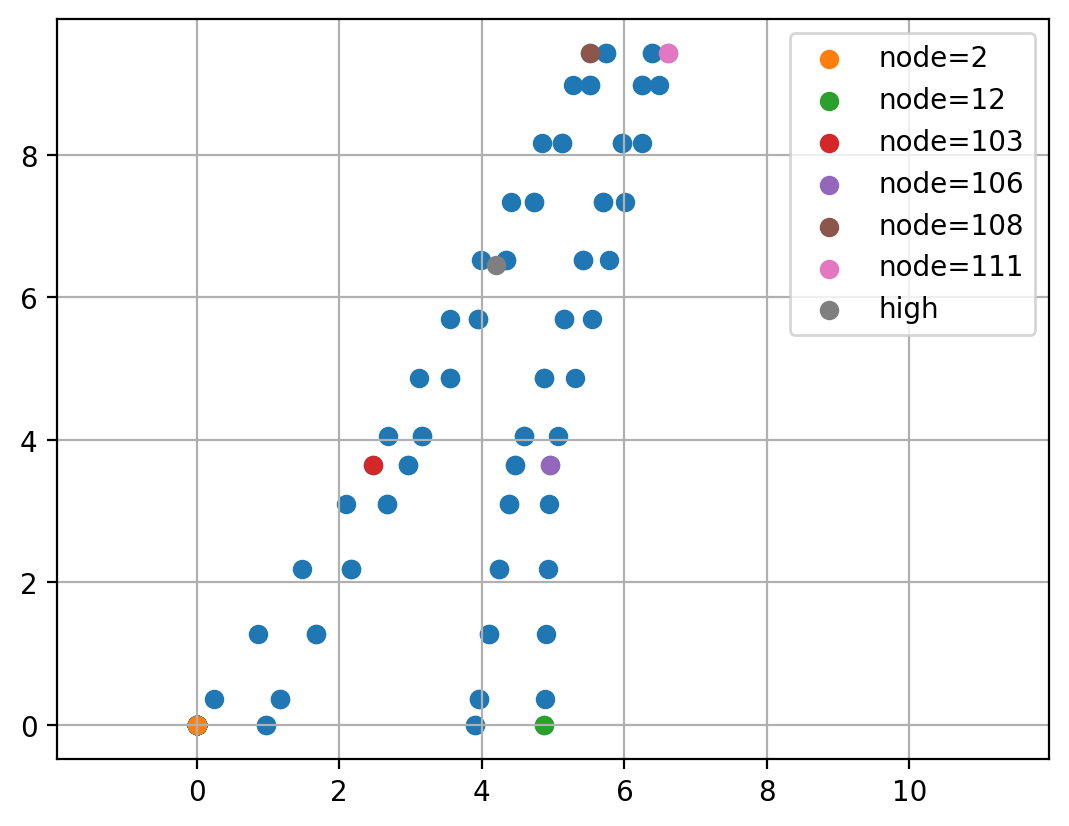

In [96]:
# this plots all the nodes
plt.scatter([data[0][i] for i in range(len(data[0]))], [data[1][i] for i in range(len(data[0]))])

# this plots the interesting nodes and prints their positions
ns = [2, 12, 103, 106, 108, 111]
for n in ns:
    print(data[0][n], data[1][n])
    plt.scatter(data[0][n], data[1][n], label=f"node={n}")
    
plt.axis("equal")

plt.scatter(4.2, 6.46, label="high")

plt.xlim(-2, 12)
plt.legend()
plt.grid()

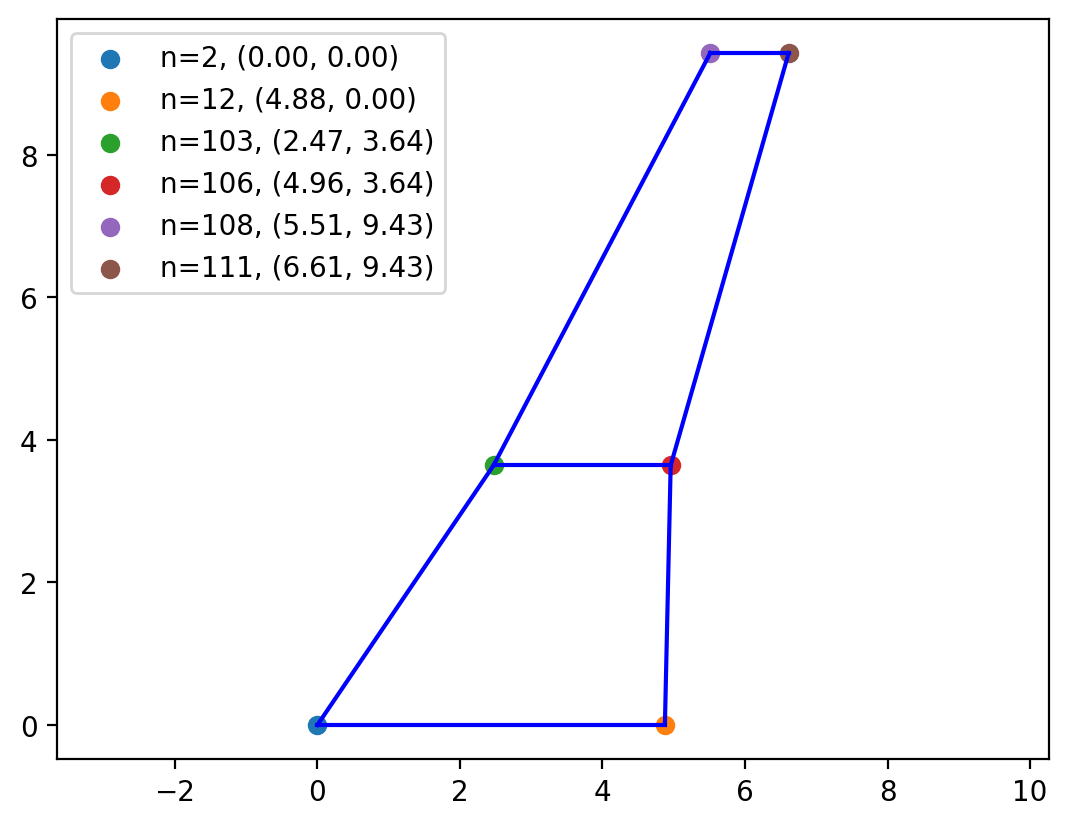

In [122]:
plt.plot((data[0][2], data[0][103]), (data[1][2], data[1][103]), color="b")
plt.plot((data[0][2], data[0][12]), (data[1][2], data[1][12]), color="b")
plt.plot((data[0][103], data[0][108]), (data[1][103], data[1][108]), color="b")
plt.plot((data[0][103], data[0][106]), (data[1][103], data[1][106]), color="b")
plt.plot((data[0][12], data[0][106]), (data[1][12], data[1][106]), color="b")
plt.plot((data[0][106], data[0][111]), (data[1][106], data[1][111]), color="b")
plt.plot((data[0][111], data[0][108]), (data[1][111], data[1][108]), color="b")
plt.axis("equal")

for n in ns:
    plt.scatter(data[0][n], data[1][n], label=f"n={n}, ({data[0][n]:.2f}, {data[1][n]:.2f})")
plt.legend()
plt.savefig("geom.png")

# this just gets some data ad finds the maximum dont worry about it

In [100]:
elements = []
'''simple i hope'''
with open("wing down cantilever", "r") as file:
    element_num = 0
    for line in file:
        words = line.strip().split()
        try:
            if words[0] == 'ELEMENT=':
                element_num = int(words[1])
                elements.append([])
            else:
                if words[0] == "7287": 
                    print(element_num)
                elements[element_num-1].append([float(word) for word in words])


        except:
            continue
headers="NODE     S1           S2           S3           SINT         SEQV    ".strip().split()

7212
7212
7213
7213
7214
7214


In [101]:
el_max = 0
s_max = 0
i=0
for element in elements:
    i+=1
    smax = max([node[-1] for node in element])
    if smax >= s_max:
        s_max = smax
        el_max = i
        

In [102]:
el_max

7287